In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", size=18)

In [12]:
houses = pd.read_csv("1.4_houses.csv")

In [31]:
houses.level.unique()

array(['luxury', 'basic', 'medium'], dtype=object)

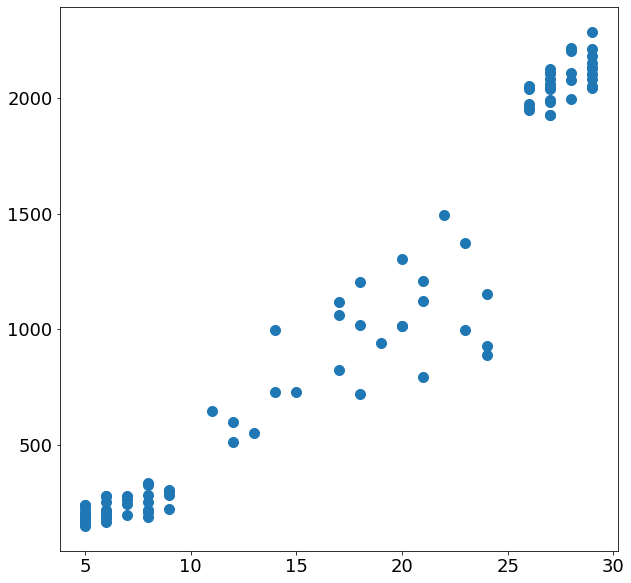

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(houses["dim_1"], houses["price"], s=100)
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

In [19]:
X = houses[["dim_1"]]
y = houses["price"]

In [20]:
reg = LinearRegression().fit(X, y)

In [22]:
reg.intercept_

-351.6846978467231

In [23]:
[b] = reg.coef_
a = reg.intercept_

In [24]:
def reg_prediction(dim1):
    return a + b * dim1

In [25]:
reg_prediction(X.dim_1[0])

2057.887633711507

In [30]:
reg.predict(X[0:2])[0:2]

array([2057.88763371, 1974.79893262])

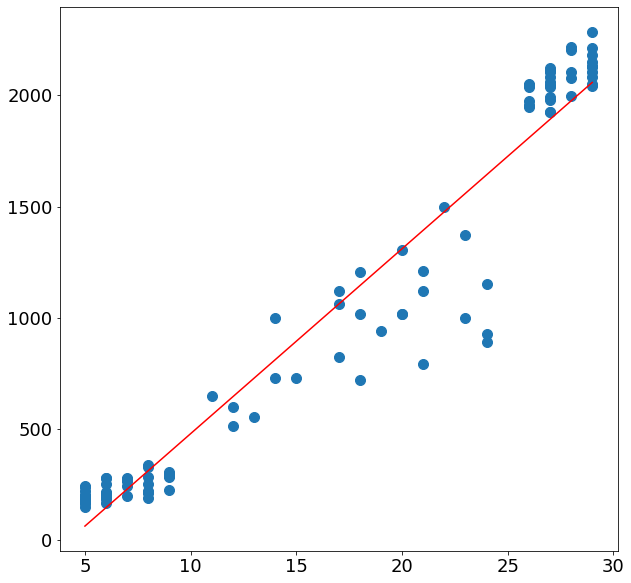

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(houses["dim_1"], houses["price"], s=100)
ax.plot([X.dim_1.min(), X.dim_1.max()], [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())], c="red")
plt.show()

In [33]:
X = houses[["dim_1", "dim_2"]]
y = houses["price"]
reg = LinearRegression().fit(X, y)

In [34]:
[b1, b2] = reg.coef_
a = reg.intercept_

def reg_prediction(dim_1, dim_2):
    return a + b1 * dim_1 + b2 * dim_2

In [36]:
reg_prediction(X.dim_1[0], X.dim_2[0])

2080.82359179565

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [38]:
X = houses[["dim_1", "dim_2"]]
y = houses["level"]

In [39]:
cl = DecisionTreeClassifier().fit(X, y)

In [40]:
print(export_text(cl))

|--- feature_0 <= 10.00
|   |--- class: basic
|--- feature_0 >  10.00
|   |--- feature_0 <= 25.00
|   |   |--- class: medium
|   |--- feature_0 >  25.00
|   |   |--- class: luxury



In [45]:
cl.predict(X[0:1])[0], y[0]

('luxury', 'luxury')

In [44]:
houses.head(5)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0


In [47]:
fig = plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

In [52]:
markers = {"basic":"o", "medium":"v", "luxury":"*"}

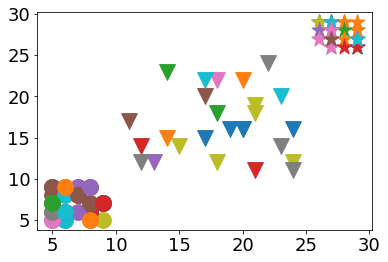

In [53]:
for d1, d2, l in zip(houses.dim_1, houses.dim_2, houses.level):
    plt.scatter(d1, d2, s=250, marker=markers[l])
plt.show()

In [54]:
from sklearn.cluster import KMeans

In [55]:
X = houses[["dim_1", "dim_2"]]
clust = KMeans(n_clusters=3).fit(X)

C:\Users\He11scream\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
[c1, c2, c3] = clust.cluster_centers_

In [57]:
fig = plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

In [58]:
markers = {"basic":"o", "medium":"v", "luxury":"*"}

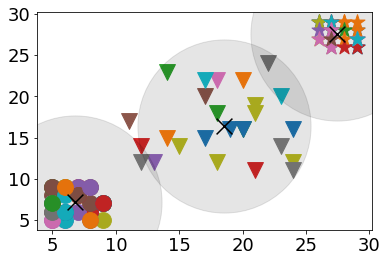

In [69]:
for d1, d2, l in zip(houses.dim_1, houses.dim_2, houses.level):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1.2e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1.2e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 1.2e2, c="black", alpha=0.1)
    

plt.show()